In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv


# ****Importing Libraries and reading data****

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
print("\n"+'-'* 30)
print("shape of data:",data.shape) 
print("\n"+'-'* 30)
print("\nno dimensions of data:",data.ndim)
print("\n"+'-'* 30)
print("\nsize of data:",data.size)
print("\n"+'-'*30)
print("\nSum fo all null values:\n",data.isnull().sum())
print("\n"+'-'*30)


------------------------------
shape of data: (5171, 4)

------------------------------

no dimensions of data: 2

------------------------------

size of data: 20684

------------------------------

Sum fo all null values:
 Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

------------------------------


In [5]:
display("Top 5 rows :",data.head())
display("Last 5 Rows :",data.tail())

'Top 5 rows :'

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


'Last 5 Rows :'

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


# ****data Visualizations****

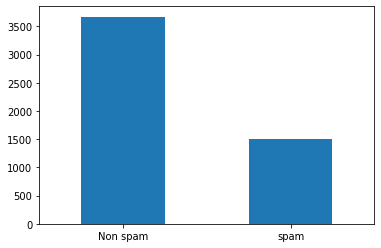

In [6]:
Vis = data['label_num'].value_counts()
Vis.plot(kind="bar")
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0)
plt.show()

In [7]:
# label spam mail as 0;  ham mail as 1;

data.loc[data['label'] == 'spam', 'Category',] = 0
data.loc[data['label'] == 'ham', 'Category',] = 1

In [8]:
# separating the data as texts and label

X = data['text']

Y = data['label']

In [9]:
print(X)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object


In [10]:
print(Y)

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object


# ****Splitting the data into training data & test data****

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [12]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136,)
(1035,)


# ****Feature Extraction****

In [13]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_transformed = feature_extraction.fit_transform(X_train)
X_test_transformed = feature_extraction.transform(X_test)



In [14]:
print(X_train)

2209    Subject: hplc to wellhead\r\ndaren here is the...
2000    Subject: mobil chemical - hpl meter # 1256 - e...
5030    Subject: revised nom 5 / 5 - eastrans ; revise...
1376    Subject: re : exxon company , usa global # 960...
1564    Subject: your pharmacy nx\r\nwant a cheap pain...
                              ...                        
789     Subject: incr ' ease yo ' ur man ' hood by 4 -...
968     Subject: subscribers receive first notice on r...
1667    Subject: neon for march 28\r\nhere is the neon...
3321    Subject: re : first delivery - pure resources ...
1688    Subject: enhance your chest size\r\nemail is l...
Name: text, Length: 4136, dtype: object


In [15]:
print(X_train_transformed)

  (0, 3871)	0.13387711316973605
  (0, 531)	0.14556222812251965
  (0, 30451)	0.08468916670398006
  (0, 43273)	0.14556222812251965
  (0, 3890)	0.14556222812251965
  (0, 548)	0.14556222812251965
  (0, 37262)	0.11275796314501375
  (0, 2908)	0.11535664415295803
  (0, 456)	0.14556222812251965
  (0, 26297)	0.09506000151609588
  (0, 36190)	0.11400727959297849
  (0, 2478)	0.13872687405852518
  (0, 521)	0.14556222812251965
  (0, 16808)	0.11843023142166303
  (0, 22041)	0.13387711316973605
  (0, 2706)	0.14556222812251965
  (0, 522)	0.14556222812251965
  (0, 32060)	0.07311834410351342
  (0, 19411)	0.04211028825505044
  (0, 2537)	0.13872687405852518
  (0, 517)	0.14556222812251965
  (0, 19429)	0.14556222812251965
  (0, 16637)	0.24438399643390496
  (0, 3875)	0.14556222812251965
  (0, 836)	0.14556222812251965
  :	:
  (4135, 8873)	0.07154271542163933
  (4135, 16161)	0.07327358549803296
  (4135, 26936)	0.07154271542163933
  (4135, 15691)	0.07812310961344454
  (4135, 14167)	0.07812310961344454
  (4135, 11

# ****Logistic Regression****

In [16]:
model = LogisticRegression()

In [17]:
# training the Logistic Regression model with the training data
model.fit(X_train_transformed, Y_train)

LogisticRegression()

In [18]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_transformed)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [19]:
print('Accuracy on training data : ', accuracy_on_training_data *100)

Accuracy on training data :  99.70986460348162


In [20]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_transformed)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [21]:
print('Accuracy on test data : ', accuracy_on_test_data*100)

Accuracy on test data :  98.06763285024155
